In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
d = {'SALESPERSON':list(range(1,31)),'old_scheme':[52,103,59,75,84,73,35,110,44,82,67,64,78,53,41,39,80,87,73,65,28,62,49,84,63,77,67,101,91,50]
    ,'new_scheme': [62,122,54,82,84,86,32,104,38,107,84,85,99,39,34,58,73,53,66,78,41,71,38,95,81,58,75,94,100,68]}

In [70]:
ins = pd.DataFrame(d)

In [71]:
oldmean = ins['old_scheme'].mean()
newmean = ins['new_scheme'].mean()
print('old scheme mean',oldmean)
print('new scheme mean',newmean)

old scheme mean 67.86666666666666
new scheme mean 72.03333333333333


In [72]:
ins[['old_scheme','new_scheme']].describe()

,old_scheme,new_scheme
count,30.000000,30.000000
mean,67.866667,72.033333
std,20.569032,24.062395
min,28.000000,32.000000
25%,52.250000,55.000000
50%,67.000000,74.000000
75%,81.500000,85.750000
max,110.000000,122.000000


In [73]:
### check outliers

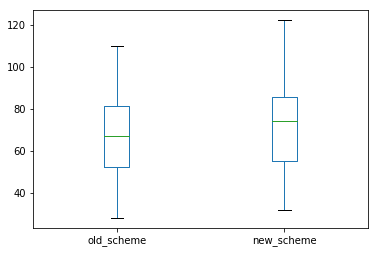

In [74]:
ins[['old_scheme','new_scheme']].plot(kind='box')

In [75]:
### check normality

In [76]:
ins['change'] = ins['new_scheme'] - ins['old_scheme']

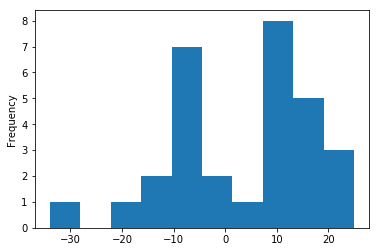

In [77]:
ins['change'].plot(kind='hist')

In [78]:
from scipy import stats

In [79]:
stats.shapiro(ins[['change']])

(0.9338992834091187, 0.06237935647368431)

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-34, -19, -14, -11,  -7,  -7,  -7,  -7,  -6,  -6,  -5,  -3,   0,
           7,   8,   9,   9,  10,  11,  13,  13,  13,  17,  18,  18,  19,
          19,  21,  21,  25], dtype=int64)),
 (14.190418197284226, 4.166666666666664, 0.9667933617276853))

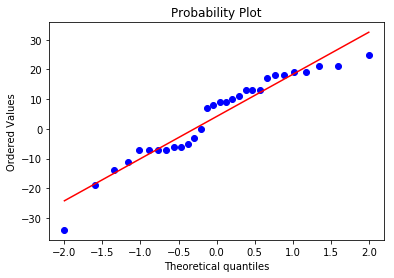

In [80]:
stats.probplot(ins['change'],plot=plt)

In [81]:
### test of significance paired sample t test
# H0 - The incentive scheme is not effective. change in sales figures is due to random chance
# Ha - the incentive scheme is effective. change in sales figures is not due to random chance.

In [82]:
stats.ttest_rel(ins['old_scheme'],ins['new_scheme'])

Ttest_relResult(statistic=-1.615950247507763, pvalue=0.11693357480614604)

In [83]:
# p value is > 0.05 hence reject the null hypothesis.
# enough evidence exists to say that the incentive scheme may be responsible for higher sales figures

In [84]:
#sum of squared difference
sqd = sum((ins['old_scheme']-ins['new_scheme'])**2)

In [85]:
#sum of difference
sud = sum(ins['old_scheme']-ins['new_scheme'])

In [86]:
N = len(ins['SALESPERSON'])

In [87]:
## standard deviation
import math
stdev = math.sqrt((sqd-(sud**2/N))/(N-1))

In [88]:
##  std error
stder = stdev / math.sqrt(N)

In [89]:
## t stat
t_stat = (ins['old_scheme'].mean()-ins['new_scheme'].mean())/stder

In [90]:
degfree  = N - 1

In [91]:
cv = stats.t.ppf(1.0 - 0.05,degfree)

In [92]:
### p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0

p_value  = (1.0 - stats.t.cdf(abs(t_stat),degfree))*2

In [93]:
p_value

0.11693357480614552

In [110]:
## Probability of type 1 error
##The probability of making a type I error is α, which is the level of significance you set for your hypothesis test.
## An α of 0.05 indicates that you are willing to accept a 5% chance that you are wrong when you reject the null hypothesis

In [129]:
from scipy.stats import ttest_1samp
from statsmodels.stats.power import ttest_power
t_stt,pvalue = ttest_1samp(ins['new_scheme'] - ins['old_scheme'], 5)

In [130]:
pvalue

0.7488702894403063

In [131]:
# power of the test

In [132]:
POT = (np.mean(ins['new_scheme']) - np.mean(ins['old_scheme'])) / np.sqrt(((N-1)*np.var(ins['old_scheme'])+(30-1)*np.var(ins['new_scheme'])) / N+N-2)

In [133]:
POT

0.1341720381860612

In [134]:
ttest_power(POT, nobs = N , alpha = 0.05, alternative = 'larger')

0.17695614113526614